In [7]:
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs

In [4]:
# Function to plot temperature using cartopy
def contour_plot(ds):
    # Specify projection
    crs = ccrs.PlateCarree()

    # Create figure and axes
    fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs})

    # Specify variables
    X = ds['lon']
    Y = ds['lat']
    Z = ds.squeeze()

    # Create contour plot of SST
    im = ax.contourf(X,Y,Z,transform=crs)

    # Add grid lines, coastlines
    ax.gridlines()
    ax.coastlines()

    # Set colorbar
    cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05)
    cbar.set_label('$^\circ\,K$',fontsize=12)

# Difference in Decadal Mean Max Temperature: 1950s to 2090s

## Individual Ensemble Members

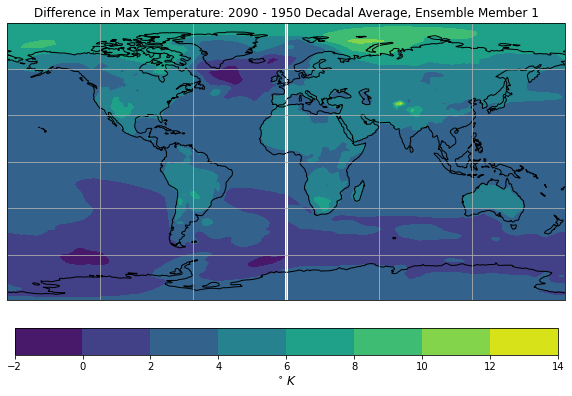

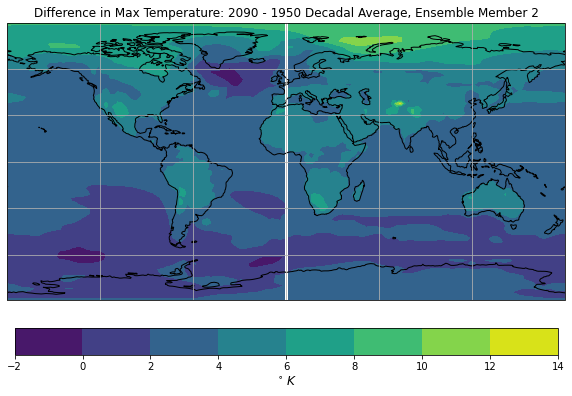

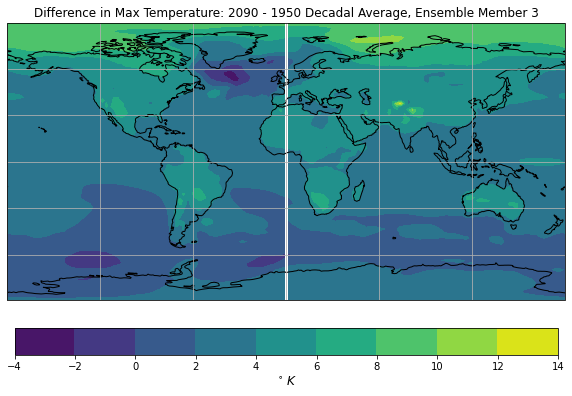

In [21]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/GFDL_LEs/ATM/'
experiment = 'RCP85'
filename = '/t_ref_max.rcp85.ens*.1950_2100.nc'
paths = rootdir+experiment+filename

# Load data from matching files
data = xr.open_mfdataset(paths,combine='nested',concat_dim='ensemble')

# Plot temp difference for each ensemble member
for i in range(0,3):
    ds = data.isel(ensemble=i)
    # Decadal average for 1950s
    ds_1950 = ds['t_ref_max'].isel(time=slice(0,3650)).mean(dim='time')
    # Decadal average for 2090s
    ds_2090 = ds['t_ref_max'].isel(time=slice(-3650,None)).mean(dim='time')
    
    # Get difference
    ds_diff = ds_2090-ds_1950
    contour_plot(ds_diff)
    plt.title('Difference in Max Temperature: 2090 - 1950 Decadal Average, Ensemble Member ' + str(i+1))

## Ensemble Mean

Text(0.5, 1.0, 'Ensemble Mean Difference in Max Temperature: 2090 - 1950 Decadal Average')

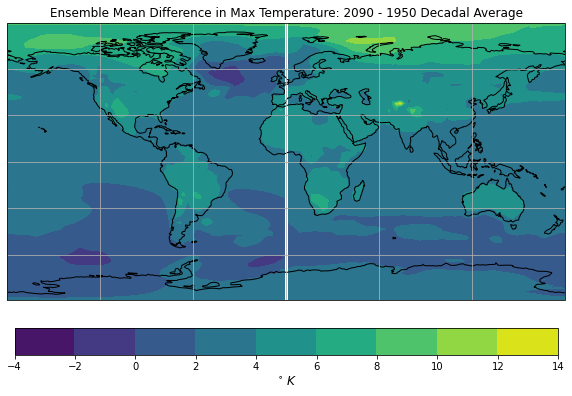

In [20]:
# Calculate ensemble mean temperature difference
ds_2090_mean = data['t_ref_max'].isel(time=slice(-3650,None)).mean(dim='time')
ds_1950_mean = data['t_ref_max'].isel(time=slice(0,3650)).mean(dim='time')
ds_diff_mean = (ds_2090_mean-ds_1950_mean).mean(dim='ensemble')

# Plot ensemble mean
contour_plot(ds_diff_mean)
plt.title('Ensemble Mean Difference in Max Temperature: 2090 - 1950 Decadal Average')